# Output Analysis SocEval

## Setup

In [1]:
# load data

import json
from pathlib import Path

# dir_path = Path("results/sec_instruct_2025-09-19_07.54_Qwen_Qwen3-14B-Base_lr=4e-05_epochs=2_sched=WarmupCosineLR_max-seq=4096_fp16=False_bf16=True_device-batch-size=2_grad-acc_steps=4_warmup=0.15_neftune=5_pad-free=True_loss=nll")
# dir_path = Path("results/checkpoint-750")
dir_path = Path("results/Qwen3-14B")

threat_intel_results = json.loads((dir_path / "threat_intel_reasoning_responses.json").read_text())
malware_analysis_results = json.loads((dir_path / "malware_analysis_responses.json").read_text())

In [2]:
# extract json helper function

import re

# Regex to find a JSON object with key "correct_answers"
json_pattern = r'\{[^{}]*"correct_answers"\s*:\s*\[[^\]]*\][^{}]*\}'

def extract_json(response: str) -> dict | None:
    # Normalize newlines and extra spaces
    normalized = re.sub(r'\s+', ' ', response.strip())

    match = re.search(json_pattern, normalized)
    if not match:
        return None

    json_str = match.group(0)

    try:
        parsed = json.loads(json_str)
        # Ensure the structure matches {"correct_answers": list of strings}
        if isinstance(parsed, dict) and isinstance(parsed.get("correct_answers"), list):
            return parsed
    except json.JSONDecodeError:
        pass

    return None

# Sanity check
print(extract_json("<think>\n\n</think>\n\n**1. Report Overview**  \nThe detonation report describes a Windows executable that is a .NET/Mono binary. It exhibits a wide range of behaviors, including loading the .NET runtime, accessing the registry, queuing APCs, creating processes, and performing cryptographic operations. Network activity shows connections to a domain (t.me) and attempts to retrieve files via HTTP GET requests. The malware also manipulates Windows services, uses encryption for C2 traffic, and includes anti\u2011debugging and packing techniques.\n\n**2. Technique Summary**  \n- **Execution & Persistence**: Loads .NET assemblies, uses Component Object Model (COM) objects, creates Windows services, and employs DLL side\u2011loading.  \n- **Privilege Escalation**: Adjusts token privileges, queues APCs, and attempts to inject code into other processes.  \n- **Defense Evasion**: Packs the binary with Confuser, encrypts strings, performs anti\u2011debug checks, and modifies registry keys to hide its presence.  \n- **Credential Access**: Searches for credentials stored in browsers and password stores.  \n- **Discovery**: Queries system information, checks language settings, enumerates processes, and reads registry values.  \n- **Collection**: Captures screenshots, stages local data, and gathers information from files and directories.  \n- **Command & Control**: Communicates over HTTP/HTTPS, uses DNS queries, and encrypts the channel with AES.  \n- **Impact**: Encrypts files on the host and can trigger system shutdown/reboot.\n\n**3. Mapping Techniques to Options**  \n- **Option A \u2013 Data exfiltration**: The malware uploads data to a remote web server and uses encrypted channels, matching the \u201cData from Local System\u201d and \u201cEncrypted Channel\u201d techniques.  \n- **Option B \u2013 Command execution**: It loads additional modules at runtime, creates processes, and uses COM for code execution, aligning with \u201cComponent Object Model\u201d and \u201cProcess Discovery\u201d.  \n- **Option C \u2013 Ransomware deployment**: The presence of file encryption capabilities directly corresponds to the \u201cData Encrypted for Impact\u201d technique, indicating ransomware\u2011like behavior.  \n- **Option D \u2013 Malware updates**: The report mentions the use of web protocols for downloading files (e.g., GET requests to t.me), which can be interpreted as fetching updates or additional payloads.\n\n**4. Answer Selection**  \nGiven the explicit file\u2011encryption behavior and the ability to retrieve files from a remote domain, the most fitting options are **A**, **B**, and **C**. The update\u2011related activity is less emphasized compared to the primary malicious functions, so it is not selected.\n\n**5. Final Answer**  \n```json\n{\n    \"correct_answers\": [\"A\", \"B\", \"C\"]\n}\n```"))
print(extract_json("<think>\n\n</think>\n\n**Step 1 \u2013 Grasp the Question**  \nThe query asks which combination of authentication security controls would most effectively counter the SVR\u2019s use of password\u2011spraying and brute\u2011force attacks (MITRE technique T1110) as initial infection vectors.\n\n**Step 2 \u2013 Review the SVR Tactics**  \n- **Password Spraying**: Attempts a few common passwords against many usernames.  \n- **Brute Forcing**: Systematically tries many passwords on a single account.  \nBoth rely on guessing credentials, especially when users employ weak or reused passwords.\n\n**Step 3 \u2013 Examine the Provided Options**  \n| Option | Controls Mentioned |\n|--------|--------------------|\n| **A** | MFA *plus* rate limiting on authentication attempts |\n| **B** | Behavioral monitoring of authentication patterns |\n| **C** | Account lockout policies without additional security controls |\n| **D** | Strong password policies without MFA |\n| **E** | Passwordless authentication with FIDO2 |\n\n**Step 4 \u2013 Assess Each Control Set Against the Threat**  \n- **MFA**: Adds a second factor, rendering password\u2011only guesses insufficient.  \n- **Rate Limiting**: Caps the number of login attempts per account or per source, slowing down or aborting large\u2011scale spraying/brute\u2011force campaigns.  \n- **Behavioral Monitoring**: Detects anomalous login behavior (e.g., many failed attempts from a single IP) and can trigger alerts, but it is a detection tool rather than a preventive control.  \n- **Account Lockout**: Temporarily disables an account after a threshold of failed logins, which can stop brute\u2011force attempts but may also cause denial\u2011of\u2011service if misconfigured and provides no protection against MFA\u2011bypass techniques.  \n- **Strong Password Policies**: Enforce complex, unique passwords, reducing the success rate of guessing attacks, yet they do not stop an attacker who obtains a valid password.  \n- **Passwordless (FIDO2)**: Eliminates passwords altogether, removing the primary target of spraying and brute\u2011force. However, it requires infrastructure changes and may not be feasible for all environments.\n\n**Step 5 \u2013 Identify the Most Effective Combinations**  \n- **Option A** combines MFA with rate limiting, directly addressing both credential guessing and the need for a second factor.  \n- **Option B** offers detection capability but lacks a preventive layer; it can complement other controls but is not sufficient on its own.  \n- **Option C** provides lockout but no MFA, leaving accounts vulnerable if the lockout threshold is bypassed or if the attacker uses valid credentials.  \n- **Option D** relies solely on strong passwords, which are still exploitable when reused or when attackers obtain them through other means.  \n- **Option E** removes passwords entirely, offering the strongest protection, yet its practicality depends on organizational readiness.\n\n**Step 6 \u2013 Reasoning Behind the Selected Controls**  \n- **MFA** mitigates the impact of any compromised password because the attacker must also possess the second factor.  \n- **Rate Limiting** curtails the volume of login attempts, making password\u2011spraying impractical and limiting brute\u2011force success.  \n- **Behavioral Monitoring** (Option B) is valuable for spotting ongoing attacks and can trigger rapid response, but it does not prevent the initial credential guess.  \n- **Account Lockout** (Option C) can stop repeated attempts but may be evaded by spreading attempts across many accounts or by using legitimate credentials.  \n- **Strong Password Policies** (Option D) improve password entropy but do not eliminate the risk of credential reuse or phishing.  \n- **Passwordless Authentication** (Option E) is the most robust preventive measure, yet without MFA it may not provide layered defense; the advisory emphasizes MFA as a critical control.\n\n**Step 7 \u2013 Final Answer**  \nThe most effective authentication security control combination is **Option A**, which pairs MFA with rate limiting. **Option B** also contributes valuable detection, so it is considered a secondary effective measure.\n\n```json\n{\n  \"correct_answers\": [\"A\", \"B\"]\n}\n```"))

{'correct_answers': ['A', 'B', 'C']}
{'correct_answers': ['A', 'B']}


In [3]:
# stats calculation helper functions

def jaccard(set1: set, set2: set) -> float:
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    if union == 0:
        return 1.0  # Both sets are empty
    return intersection / union

def accuracy(pred: list, gold: list) -> float:
    return 1.0 if set(pred) == set(gold) else 0.0

def precision(pred: list, gold: list) -> float:
    return len(set(pred).intersection(set(gold))) / len(pred) if pred else 0.0

def recall(pred: list, gold: list) -> float:
    return len(set(pred).intersection(set(gold))) / len(gold) if gold else 0.0

def f1(pred: list, gold: list) -> float:
    p = precision(pred, gold)
    r = recall(pred, gold)
    if p + r == 0:
        return 0.0
    return 2 * (p * r) / (p + r)


def entry_stats(entry: dict) -> dict:
    pred_answers = (extract_json(entry['response']) or {}).get('correct_answers', [])
    gold_answers = entry.get('correct_answer', entry.get('correct_options', []))
    return {
        "num_tokens": entry.get('est_prompt_tokens'),
        "num_options": len(entry['options']),
        "gold_correct_options": len(gold_answers),
        "jaccard": jaccard(set(pred_answers), set(gold_answers)),
        "accuracy": accuracy(pred_answers, gold_answers),
        "precision": precision(pred_answers, gold_answers),
        "recall": recall(pred_answers, gold_answers),
        "f1": f1(pred_answers, gold_answers),
    }

## Statistical Analysis

### Stats for Different Context Lengths

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_results_num_tokens(results: list[dict], title: str) -> None:
    num_tokens = [entry_stats(entry)['num_tokens'] for entry in results]
    
    accs = [entry_stats(entry)['accuracy'] for entry in results]
    jaccards = [entry_stats(entry)['jaccard'] for entry in results]
    precisions = [entry_stats(entry)['precision'] for entry in results]
    recalls = [entry_stats(entry)['recall'] for entry in results]
    f1s = [entry_stats(entry)['f1'] for entry in results]

    stats = [accs, jaccards, precisions, recalls, f1s]

    fig, axes = plt.subplots(2, 3, figsize=(20, 10))
    for i in range(2):
        for j in range(3):
            if i == 1 and j == 2:
                break
            axes[i][j].grid(True)
            stats_idx = i * 3 + j
            axes[i][j].scatter(num_tokens, stats[stats_idx], alpha=0.6)
            axes[i][j].set_title(f'{["Accuracy", "Jaccard", "Precision", "Recall", "F1"][stats_idx]} vs Number of Tokens')
            axes[i][j].set_xlabel('Number of Tokens in Prompt')
            axes[i][j].set_ylabel(['Accuracy', 'Jaccard', 'Precision', 'Recall', 'F1'][stats_idx])
            # fit line to the scatter plot
            m, b = np.polyfit(num_tokens, stats[stats_idx], 1)
            axes[i][j].plot(num_tokens, m*np.array(num_tokens) + b, color='red')
    plt.suptitle(title)
    plt.show()

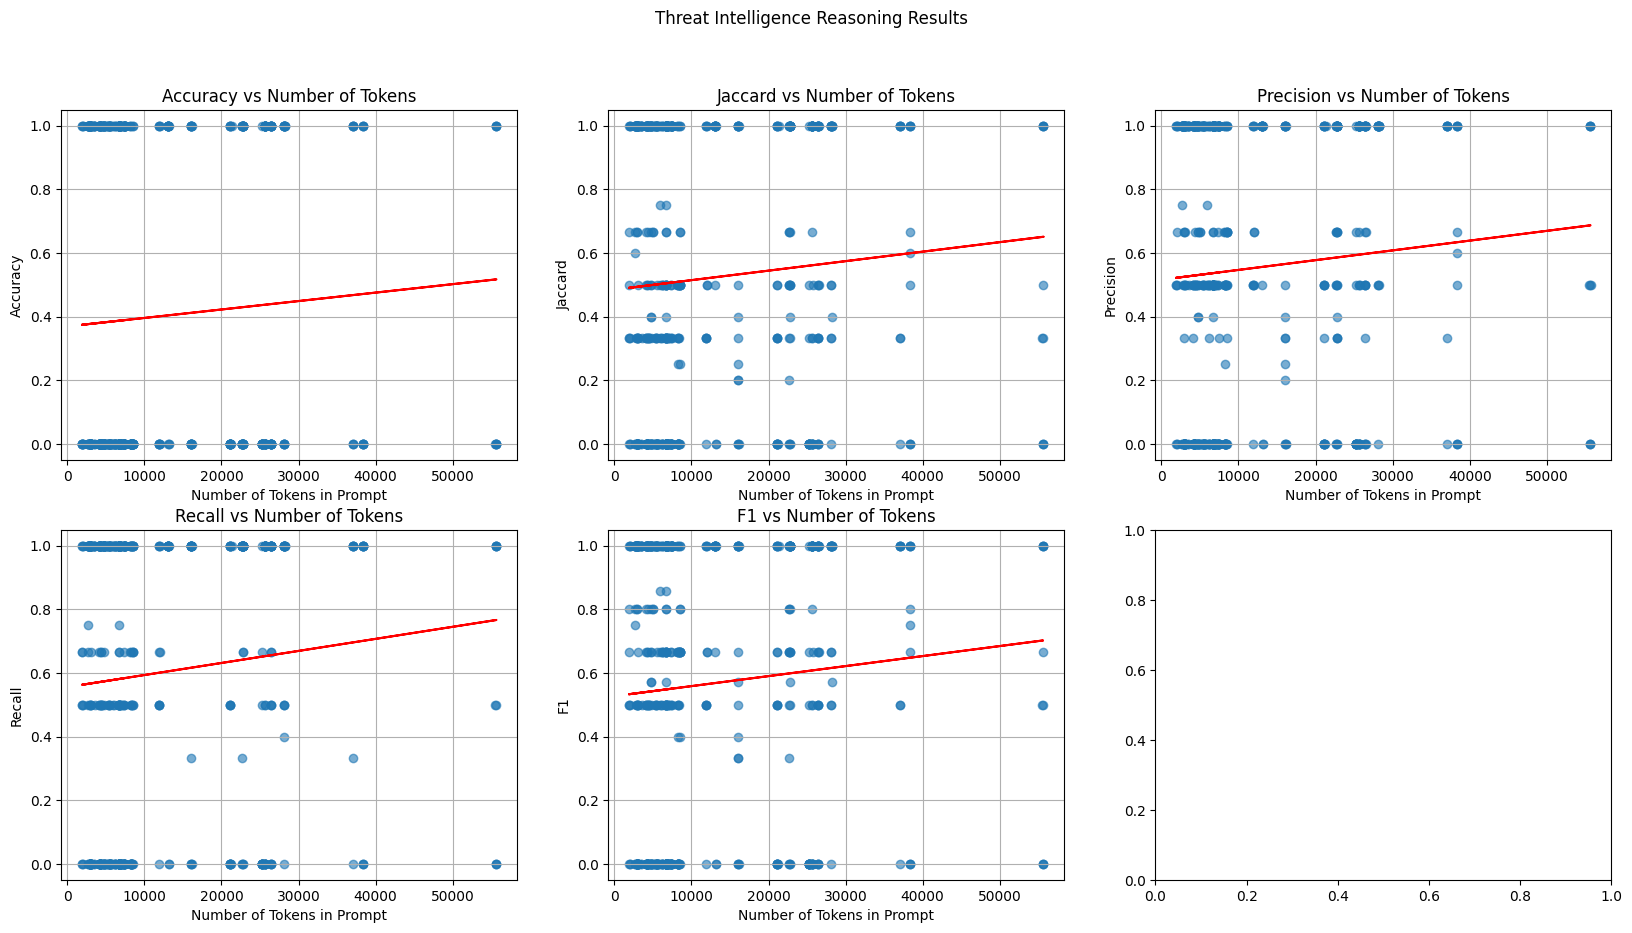

In [5]:
plot_results_num_tokens(threat_intel_results, "Threat Intelligence Reasoning Results")

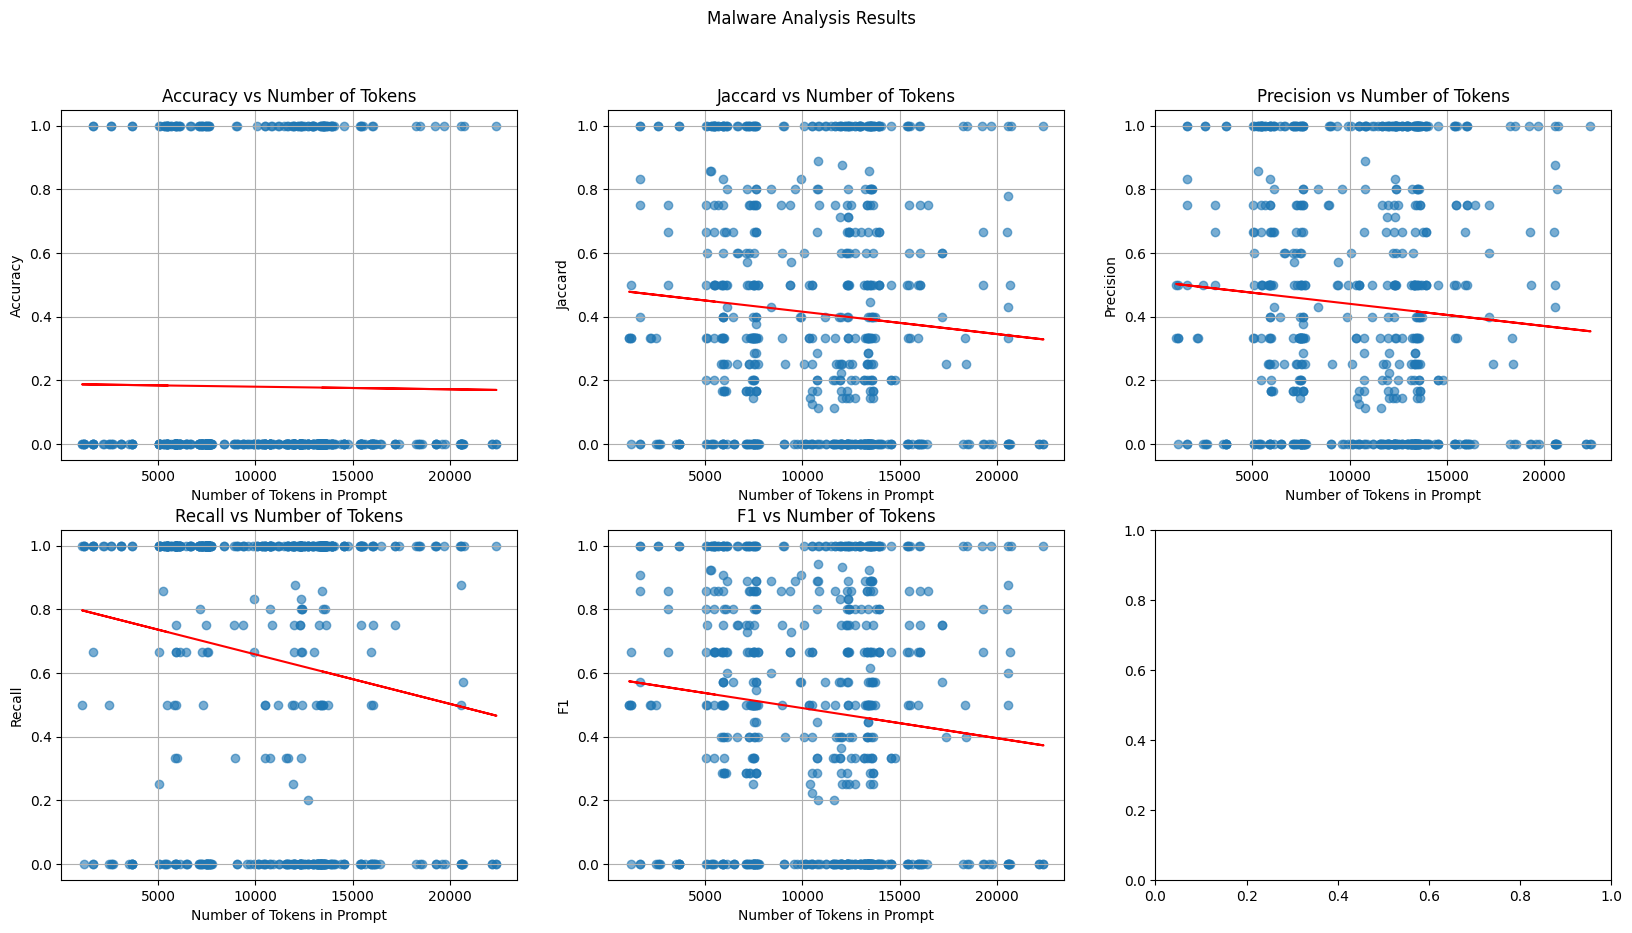

In [6]:
plot_results_num_tokens(malware_analysis_results, "Malware Analysis Results")

### Stats for Different Number of Correct Options

In [7]:
def plot_results_num_correct_options(results: list[dict], title: str) -> None:
    num_options = [entry_stats(entry)['gold_correct_options'] for entry in results]
    
    accs = [entry_stats(entry)['accuracy'] for entry in results]
    jaccards = [entry_stats(entry)['jaccard'] for entry in results]
    precisions = [entry_stats(entry)['precision'] for entry in results]
    recalls = [entry_stats(entry)['recall'] for entry in results]
    f1s = [entry_stats(entry)['f1'] for entry in results]

    stats = [accs, jaccards, precisions, recalls, f1s]

    fig, axes = plt.subplots(2, 3, figsize=(20, 10))
    for i in range(2):
        for j in range(3):
            if i == 1 and j == 2:
                break
            axes[i][j].grid(True)
            stats_idx = i * 3 + j
            axes[i][j].scatter(num_options, stats[stats_idx], alpha=0.6)
            axes[i][j].set_title(f'{["Accuracy", "Jaccard", "Precision", "Recall", "F1"][stats_idx]} vs Number of Correct Options')
            axes[i][j].set_xlabel('Number of Correct Options in Question')
            axes[i][j].set_ylabel(['Accuracy', 'Jaccard', 'Precision', 'Recall', 'F1'][stats_idx])
            # fit line to the scatter plot
            m, b = np.polyfit(num_options, stats[stats_idx], 1)
            axes[i][j].plot(num_options, m*np.array(num_options) + b, color='red')
    plt.suptitle(title)
    plt.show()

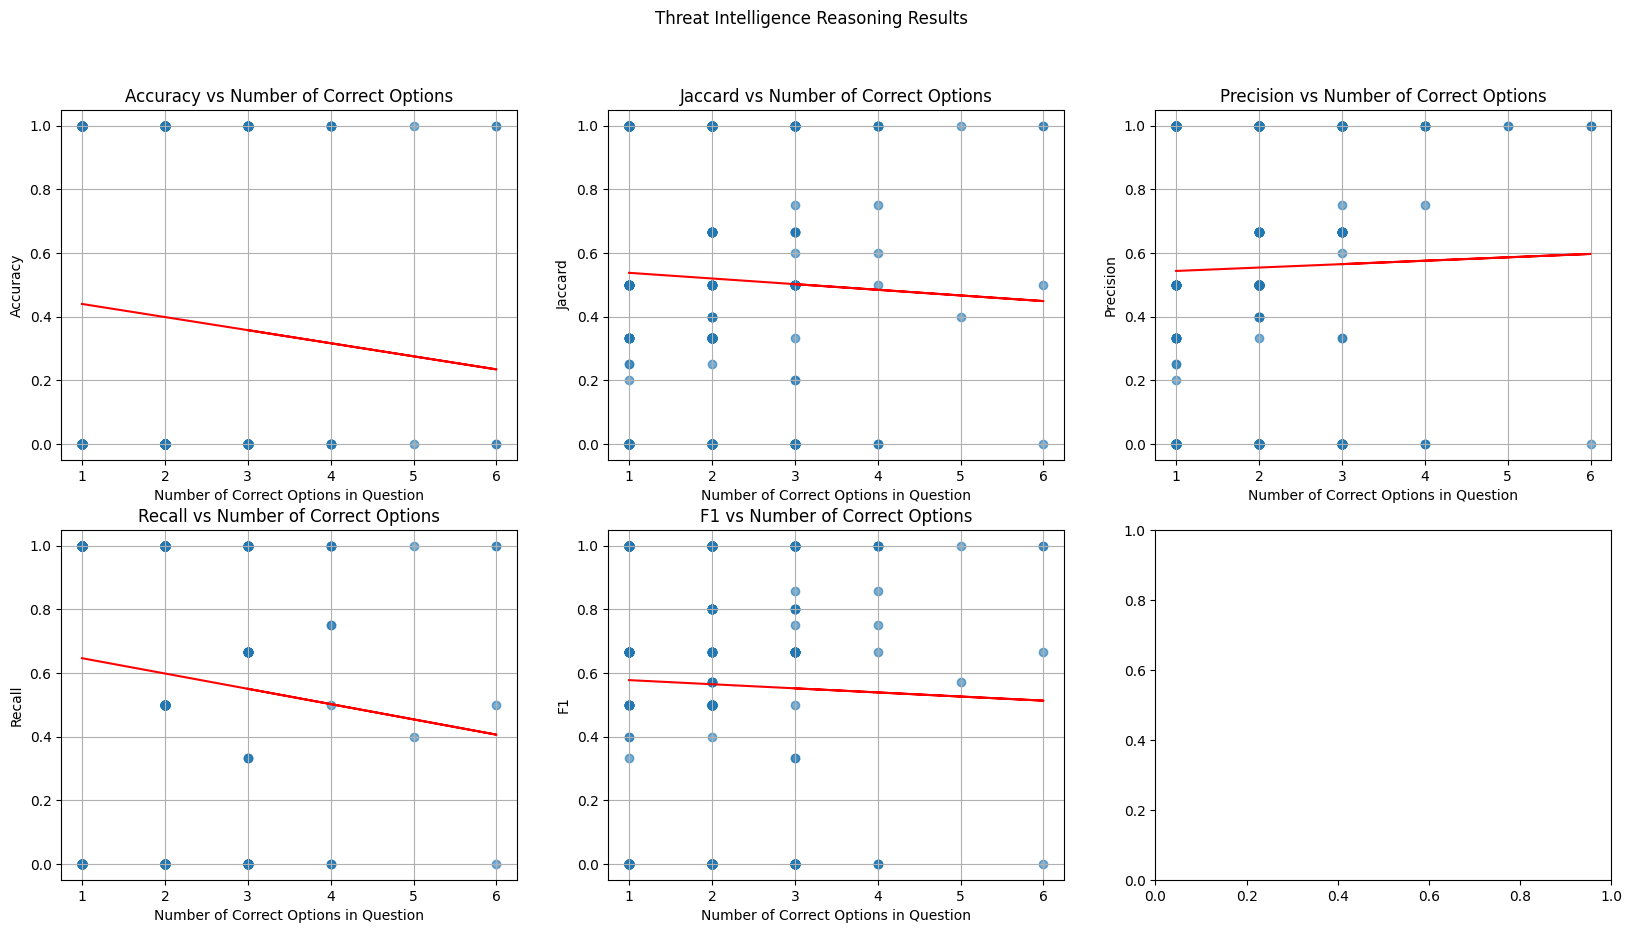

In [8]:
plot_results_num_correct_options(threat_intel_results, "Threat Intelligence Reasoning Results")

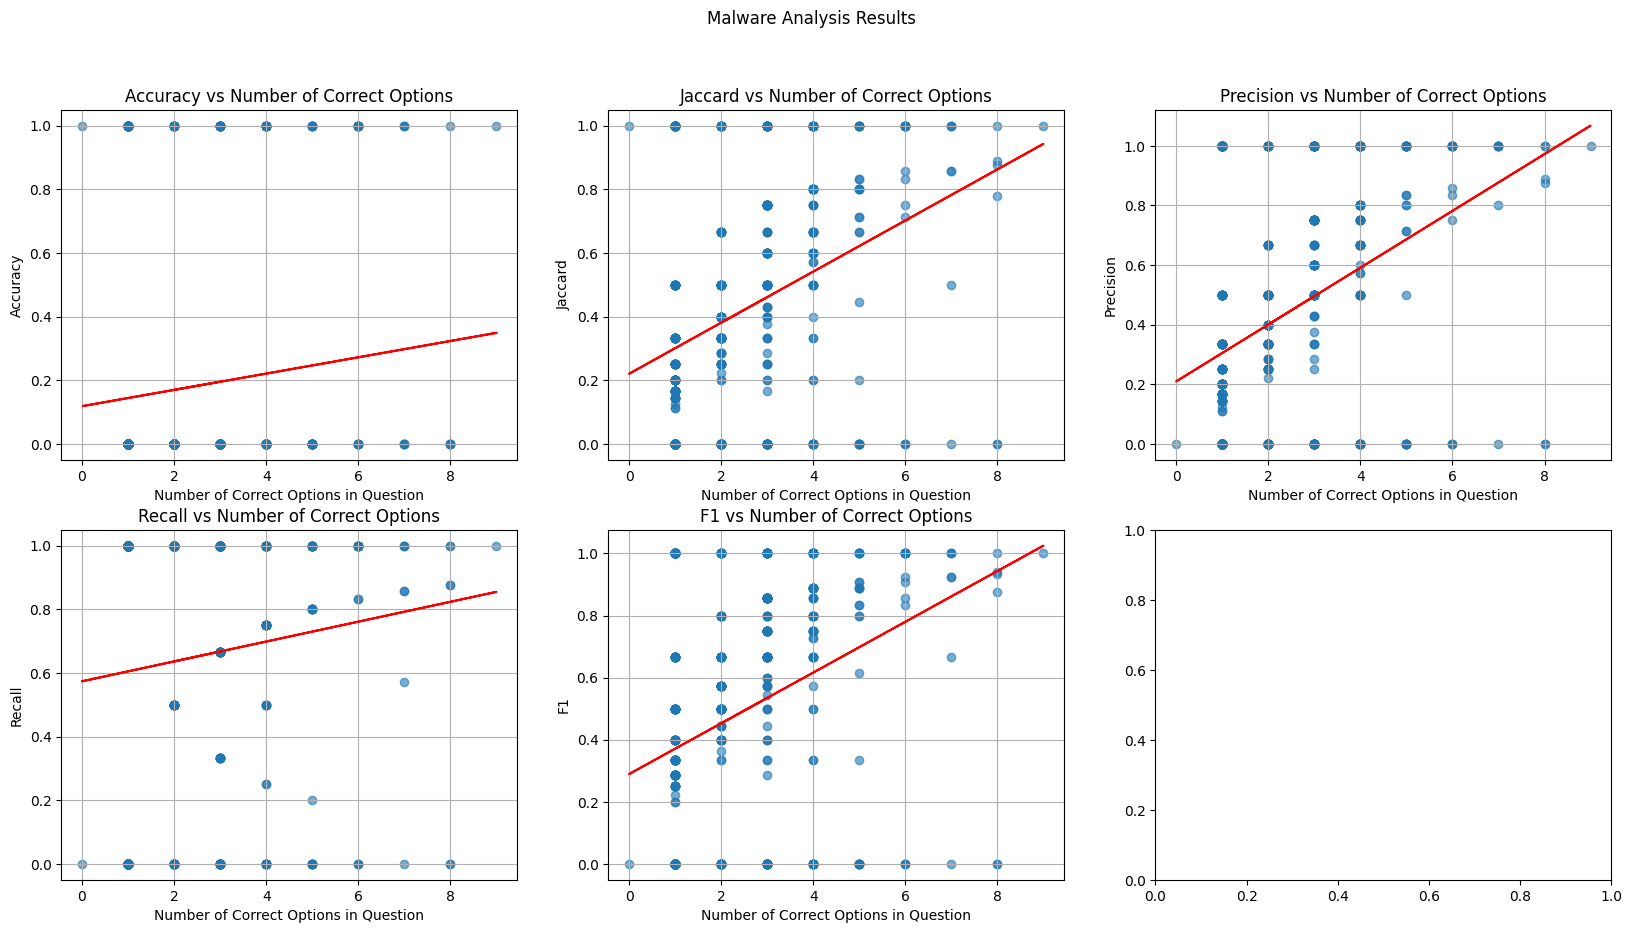

In [9]:
plot_results_num_correct_options(malware_analysis_results, "Malware Analysis Results")

### Stats for Different Number of Total Options

In [10]:
def plot_results_num_total_options(results: list[dict], title: str) -> None:
    num_options = [entry_stats(entry)['num_options'] for entry in results]
    
    accs = [entry_stats(entry)['accuracy'] for entry in results]
    jaccards = [entry_stats(entry)['jaccard'] for entry in results]
    precisions = [entry_stats(entry)['precision'] for entry in results]
    recalls = [entry_stats(entry)['recall'] for entry in results]
    f1s = [entry_stats(entry)['f1'] for entry in results]

    stats = [accs, jaccards, precisions, recalls, f1s]

    fig, axes = plt.subplots(2, 3, figsize=(20, 10))
    for i in range(2):
        for j in range(3):
            if i == 1 and j == 2:
                break
            axes[i][j].grid(True)
            stats_idx = i * 3 + j
            axes[i][j].scatter(num_options, stats[stats_idx], alpha=0.6)
            axes[i][j].set_title(f'{["Accuracy", "Jaccard", "Precision", "Recall", "F1"][stats_idx]} vs Number of Total Options')
            axes[i][j].set_xlabel('Number of Total Options in Question')
            axes[i][j].set_ylabel(['Accuracy', 'Jaccard', 'Precision', 'Recall', 'F1'][stats_idx])
            # fit line to the scatter plot
            m, b = np.polyfit(num_options, stats[stats_idx], 1)
            axes[i][j].plot(num_options, m*np.array(num_options) + b, color='red')
    plt.suptitle(title)
    plt.show()

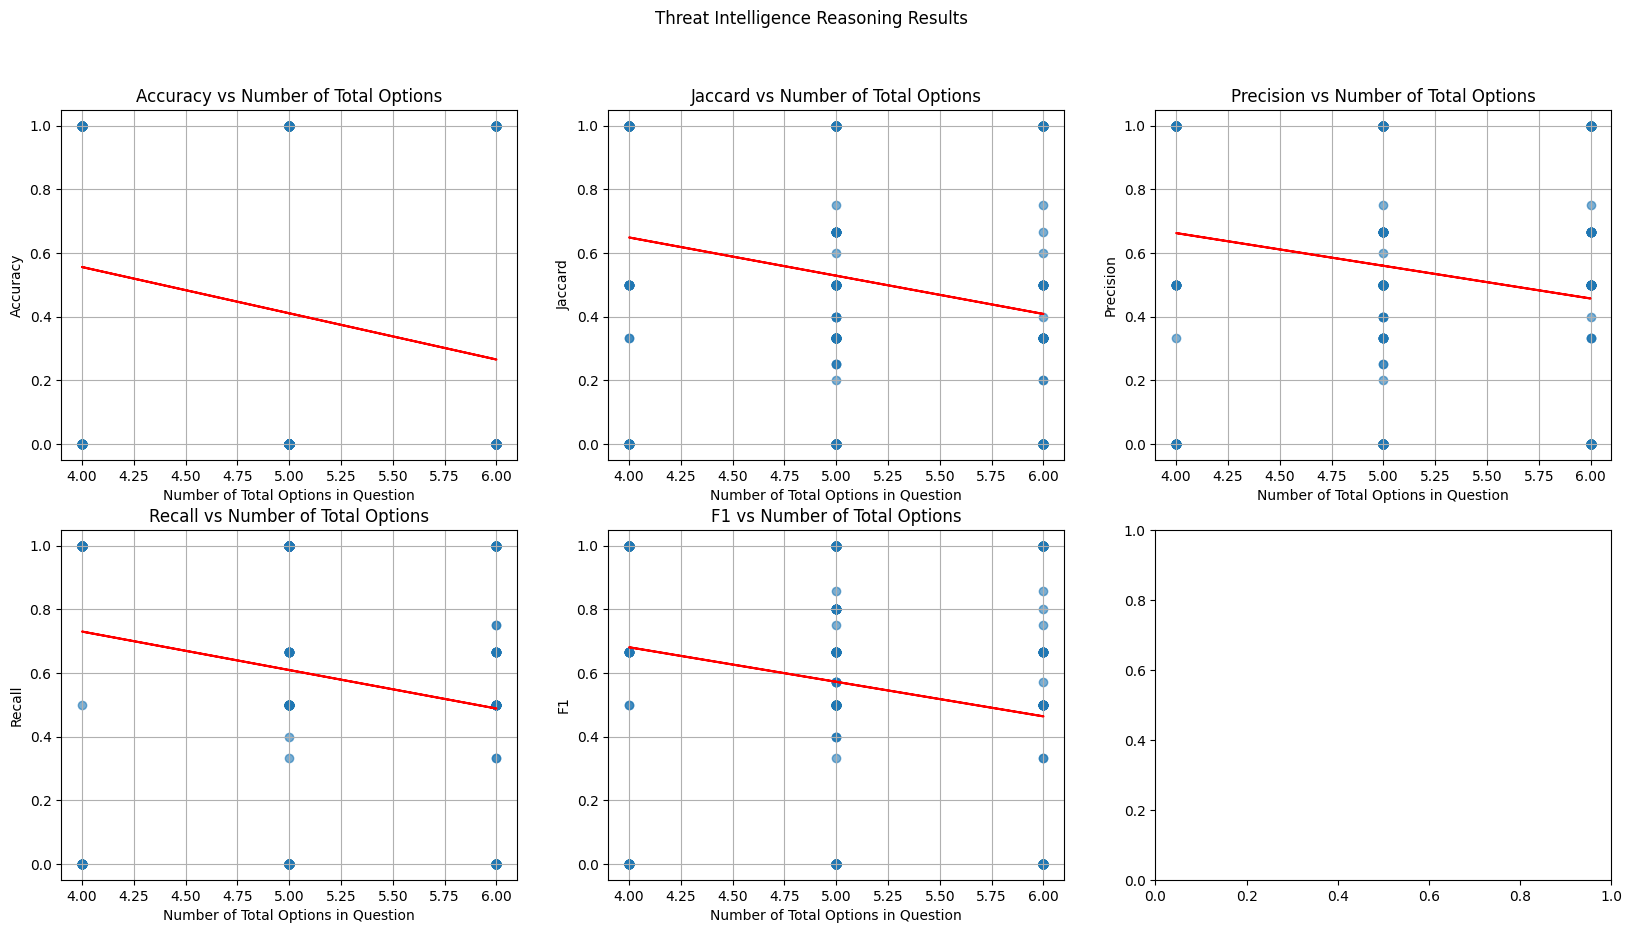

In [11]:
plot_results_num_total_options(threat_intel_results, "Threat Intelligence Reasoning Results")

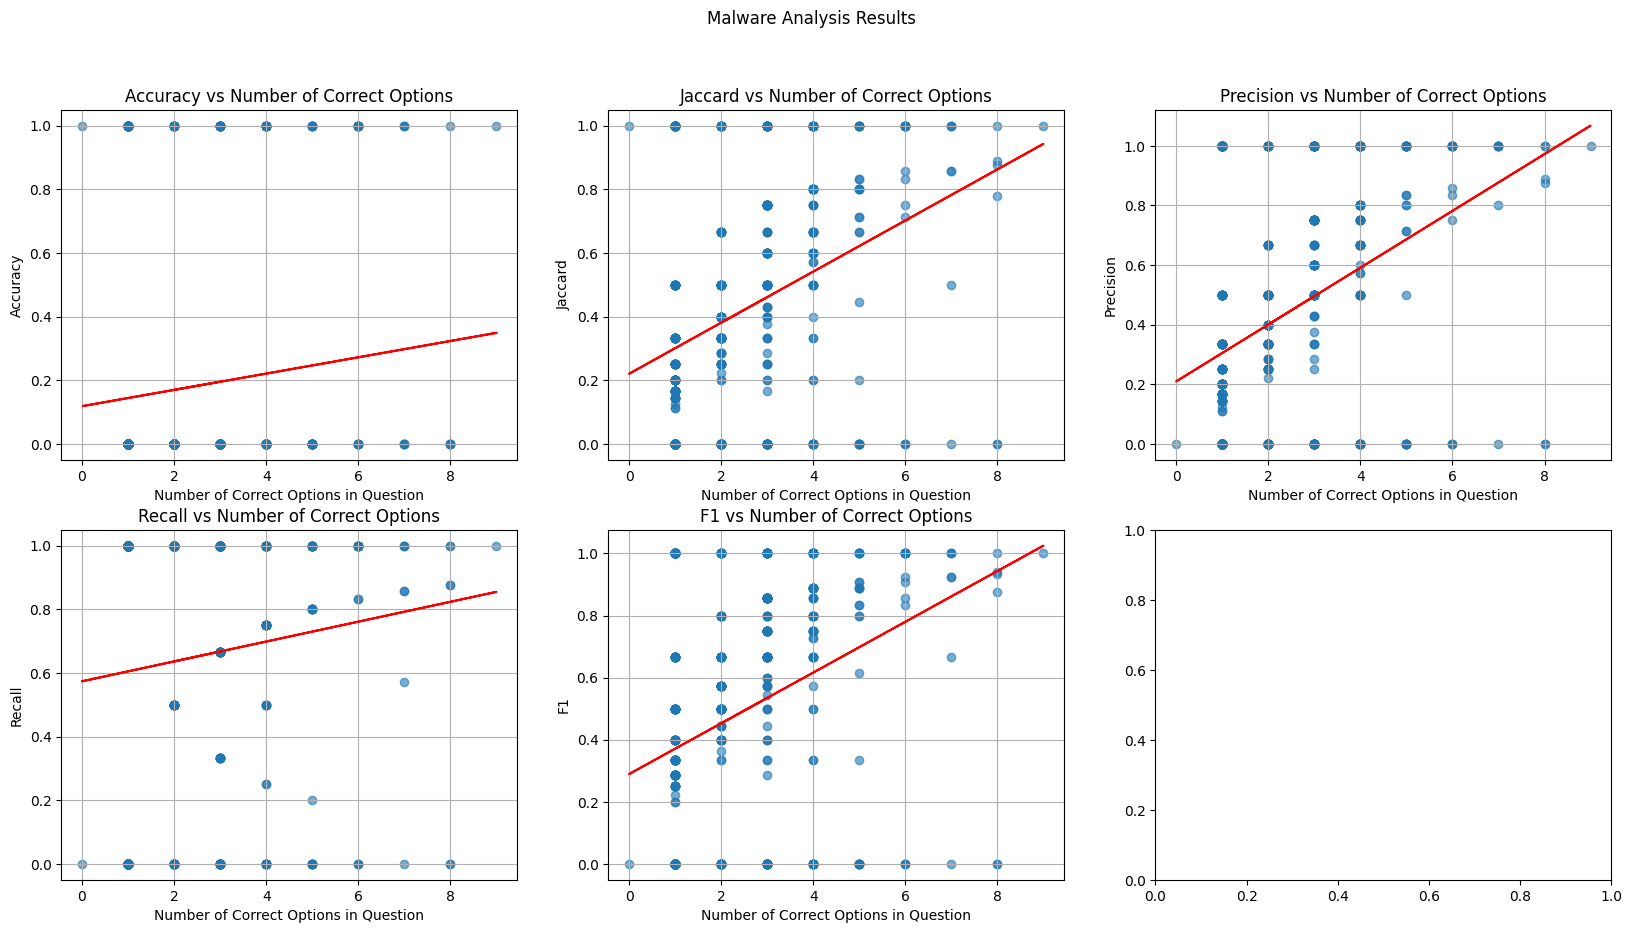

In [12]:
plot_results_num_correct_options(malware_analysis_results, "Malware Analysis Results")

## Response Analysis

### CoT Alignment Experiment

In this experiment, we replace the final answer of the model with the correct answer and ask a strong LLM whether or not the new answer aligns with the rationale.

In [13]:
import re
from beast import create_rits_llms, generate_many
from langchain.output_parsers import BooleanOutputParser

def cot_alignment_experiment(task: str) -> None:
    if task == 'threat_intel_reasoning':
        results = threat_intel_results
    elif task == 'malware_analysis':
        results = malware_analysis_results
    else:
        raise ValueError("Unknown task")
    
    llms = create_rits_llms(model_id="openai/gpt-oss-120b", temperature=0.7, top_p=0.95, reasoning_effort="medium")
    prompt_template = """You are an expert evaluator of AI-generated rationales and answers. Your task is to determine whether the provided rationale logically supports the given final answer.

[ Question ]:
{question}

[ Model's Rationale and Answer ]:
{response}

You must respond with "Yes" if the rationale supports the answer, or "No" if it does not."""

    mistakes = []
    for result in results:
        pred_answers = (extract_json(result['response']) or {}).get('correct_answers', [])
        gold_answers = result.get('correct_answer', result.get('correct_options', []))
        if set(pred_answers) != set(gold_answers):
            mistakes.append(result)

    outputs = generate_many(
        inputs=[
            {
                'question': entry['prompt'], 
                'response': re.sub(json_pattern, "{\"correct_answers\": " + json.dumps(entry.get('correct_answer', entry.get('correct_options', []))) + "}", entry['response'])
            } 
            for entry in results
        ],
        llms=llms,
        messages_template=[{'role': 'user', 'content': prompt_template}],
        num_retries=3,
        batch_size=10,
        output_parser=BooleanOutputParser(),
        checkpoint_file=str(dir_path / (task + "_cot_alignment_responses.jsonl"))
    )

    yes_count = sum(1 for output in outputs if output.result is True)
    no_count = sum(1 for output in outputs if output.result is False)
    err_count = sum(1 for output in outputs if output.result is None)

    # print summary
    print(f"Total Evaluations: {len(outputs)}")
    print(f"Yes: {yes_count} ({yes_count / len(outputs) * 100:.2f}%)")
    print(f"No: {no_count} ({no_count / len(outputs) * 100:.2f}%)")
    print(f"Errors: {err_count} ({err_count / len(outputs) * 100:.2f}%)")


ImportError: cannot import name 'convert_to_openai_data_block' from 'langchain_core.messages' (/Users/dani/Documents/work/Projects/PurpleLlama/.venv/lib/python3.10/site-packages/langchain_core/messages/__init__.py)

In [ ]:
import nest_asyncio
import asyncio # It's good practice to import asyncio before patching

# Patch asyncio to allow running new loops inside an existing one (like in a notebook)
nest_asyncio.apply() 
from dotenv import load_dotenv

load_dotenv()

cot_alignment_experiment('threat_intel_reasoning')